In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [20]:
IMAGE_SIZE=256 
BATCH_SIZE=32 

In [21]:
DATASET_PATH = r"C:\Users\kalpe\Downloads\Potato_disease"

In [22]:
import os

print(os.path.exists(DATASET_PATH))
print(os.listdir(DATASET_PATH))


True
['Blackleg', 'Potato']


In [23]:
df = tf.keras.preprocessing.image_dataset_from_directory(DATASET_PATH,shuffle=True,image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                        batch_size= BATCH_SIZE)

Found 14465 files belonging to 2 classes.


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 11572 images belonging to 2 classes.
Found 2893 images belonging to 2 classes.


In [25]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\Users\kalpe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 452s 623ms/step - accuracy: 0.9952 - loss: 0.1988 - val_accuracy: 0.9959 - val_loss: 0.0302
Epoch 2/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 452s 625ms/step - accuracy: 0.9959 - loss: 0.0354 - val_accuracy: 0.9959 - val_loss: 0.0320
Epoch 3/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 448s 619ms/step - accuracy: 0.9959 - loss: 0.0687 - val_accuracy: 0.9959 - val_loss: 0.0339
Epoch 4/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 443s 612ms/step - accuracy: 0.9960 - loss: 0.0249 - val_accuracy: 0.9959 - val_loss: 0.0168
Epoch 5/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 438s 606ms/step - accuracy: 0.9961 - loss: 0.0207 - val_accuracy: 0.9969 - val_loss: 0.0100
Epoch 6/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 434s 599ms/step - accuracy: 0.9966 - loss: 0.0149 - val_accuracy: 0.9979 - val_loss: 0.0091
Epoch 7/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 435s 601ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9983 - val_loss: 0.0110
Epoch 8/10
724/724 ━━━━━━━━━━━━━━━━━━━━ 433s 597ms/step - accuracy: 0.9966 -

In [28]:
 loss, acc = model.evaluate(val_data)
print("Validation Accuracy:", acc * 100)


181/181 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.9976 - loss: 0.0098
Validation Accuracy: 99.7580349445343


In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(
    r"C:\Users\kalpe\Downloads\test.jpg",
    target_size=(224,224)
)

img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
classes = list(train_data.class_indices.keys())

print("Predicted Class:", classes[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Predicted Class: Potato


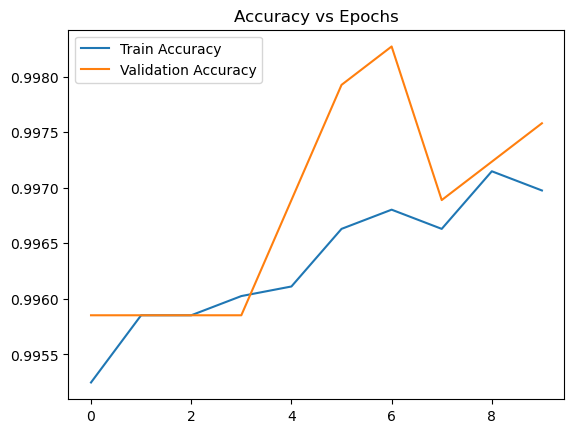

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()
